In [202]:
import numpy as np
import matplotlib.pyplot as plt
import MolecularDynamics
from importlib import reload
reload(MolecularDynamics)
from MolecularDynamics import *

Accepted 862 out of 999 samples: 86.3% acceptance rate
Accepted 173 out of 999 samples: 17.3% acceptance rate
Accepted 907 out of 999 samples: 90.8% acceptance rate
Accepted 307 out of 999 samples: 30.7% acceptance rate
Accepted 936 out of 999 samples: 93.7% acceptance rate
Accepted 401 out of 999 samples: 40.1% acceptance rate
Accepted 937 out of 999 samples: 93.8% acceptance rate
Accepted 472 out of 999 samples: 47.2% acceptance rate


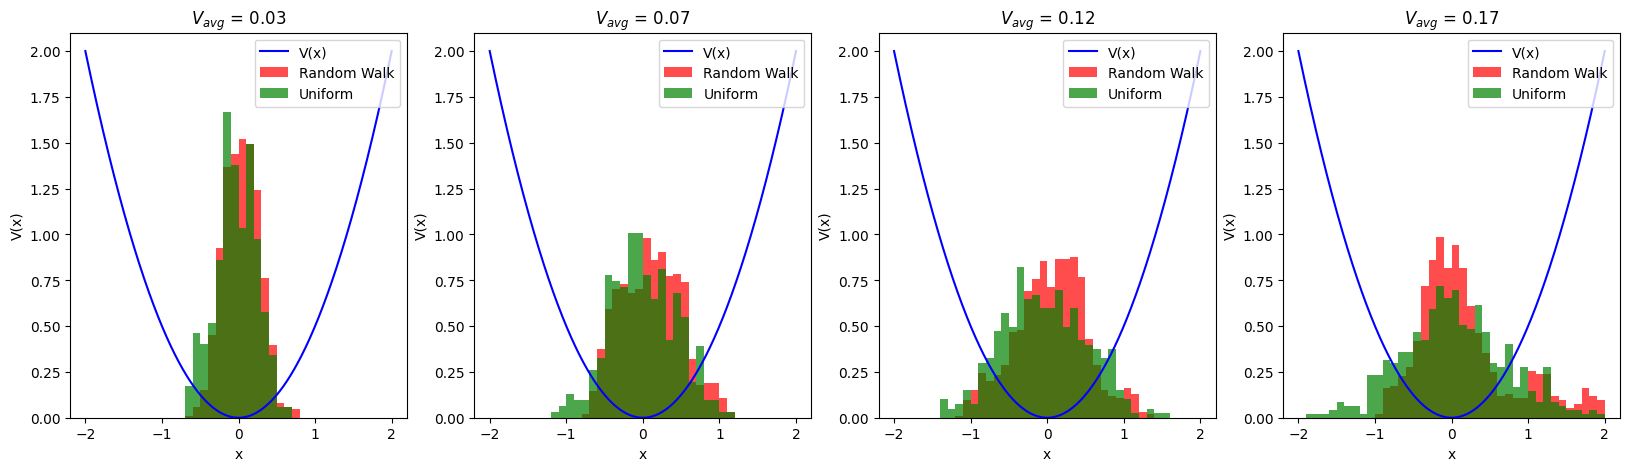

In [187]:
kts = [0.05, 0.15, 0.25, 0.35]

HarmOscs = [HarmonicOscillator(kT=kt) for kt in kts]


fig, axs = plt.subplots(1,4, figsize = (20,5))
for HO, ax in zip(HarmOscs, axs):
    HO.method = 'Random Walk'
    HO.plot_V(ax, color = 'blue')
    HO.plot_mcmc(ax, color = 'red')
    HO.method = 'Uniform'
    HO.plot_mcmc(ax, color = 'green')
    ax.set_title(r'$V_{avg}$'+f' = {HO.V_avg_direct:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('V(x)')
    ax.legend(['V(x)', 'Random Walk', 'Uniform'], loc = 'upper right')

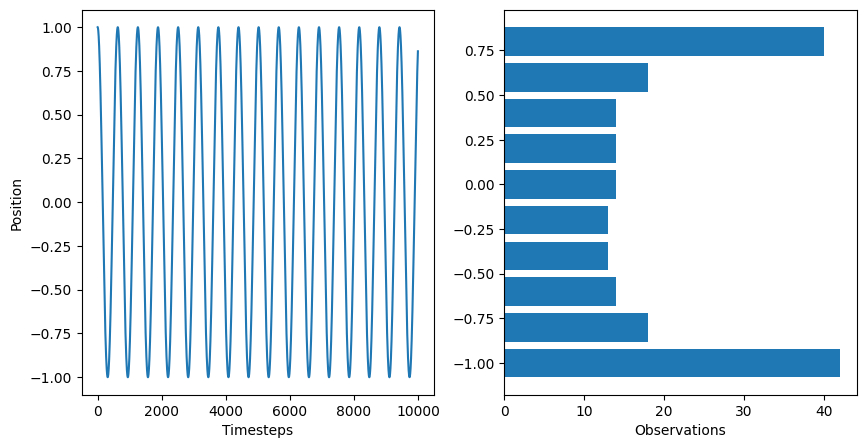

In [200]:
k_BT = 0.15
HarmOsc = HarmonicOscillator(kT = k_BT)

x_0 = 1
v_0 = 0
timesteps = 10000

xs, vs = HarmOsc.N_velocity_Verlet(x0 = x_0, v0 = v_0, N = timesteps, dt = 0.01)

observations = xs[::50]
hist, bins = np.histogram(observations, bins = 10)



fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(range(timesteps),xs)
ax[1].barh(bins[:-1], hist, height = 0.16)
ax[0].set_xlabel('Timesteps')
ax[0].set_ylabel('Position')
ax[1].set_xlabel('Observations')

plt.savefig('Figures/Harmonic_Oscillator, Velocity-Verlet.png')

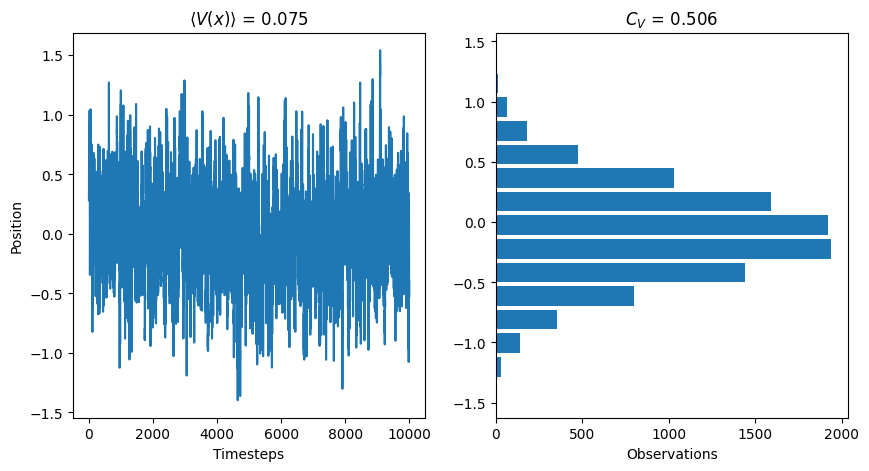

In [201]:
x_0 = 0
v_0 = 0
timesteps = 10000

xs, V_avg, C_V = HarmOsc.constant_temp_MD(x0=x_0, N=timesteps, m = 1, dt=0.01)

observations = xs
hist, bins = np.histogram(observations, bins = 15)
bar_height = (bins[1]-bins[0])/1.2

fig, ax = plt.subplots(1,2, figsize = (10,5))


ax[0].plot(range(timesteps), xs)
ax[0].set_xlabel('Timesteps')
ax[0].set_ylabel('Position')
ax[0].set_title(r'$\left < V(x) \right >$' f' = {V_avg:.2g}')


ax[1].barh(bins[:-1], hist, height = bar_height)
ax[1].set_xlabel('Observations')
ax[1].set_title(r'$C_V$' f' = {C_V:.3g}')







plt.savefig('Figures/Harmonic_Oscillator, MD.png')